<p> 
<img src="https://drive.google.com/uc?id=15e9jqlH6r33n0cd5s9LQGCmVg3gzlyNN" align="left" width="250" height="300" > 
<br>
<h1><b><center>Computational Methods </center></b></h1>
<h2><b><center>Parcial 4</center></b><h2>
<h3><i><center>Juanita Andrea Agudelo</center></i><h2>
<h3><i><center>1000722415</center></i><h2>
<h5><b><center>8 Abril 2022</center></b><h5>

# Examen parcial 4  $\color{red}{\text{(10p max)}}$ (Equaciones diferenciales)
* Antes de enviar el archivo, $\textbf{reiniciar y ejecutar el kernel}$ y ver que el archivo se compila sin errores
* enviar el archivo jupyter sin anexos antes de las 10.20am del 08.04.2022 a mi dirección de correo electrónico: michal.hemmerling@udea.edu.co 

## Ejercicio 1. $\color{red}{\text{(3p)}}$ Equaciones diferenciales - problema de valor de limite (boundary value problem).

Transporte de calor en un objeto puede ser escrito usando segunda orden equacion diferencial:
$$\frac{d^2T}{dx^2}=0.01T-0.2$$
a) Usando `scipy.integrate.solve_bvp` resolver este equacion diferencial cumpliendo siguientes condiciones de limite:

T(x=0)=40  
T(x=10)=200

b) Hace grafico de T(x) vs x (con etiquietas y legend) 

## Ejercicio 2.  $\color{red}{\text{(4p)}}$ Ecuaciones diferenciales - problema de valor inicial (initial value problem).

La ley de Newton del enfriamiento tiene forma de ecuación diferencial

$$\frac{dy}{dt}=k(y-T_{amb}) $$


donde:
* y es la temperatura actual de un objeto
* t es tiempo
* k es un valor constante de enfriamiento
* $T_{amb}$ es la temperatura del ambiente

Digamos que una taza de café tiene una temperatura inicial de 90 centígrados y la temperatura ambiente es de 25 centígrados.

a) usando `scipy.integrate.solve_ivp` resolver ecuación diferencial:

* para el rango t: t=[0:60], [minutos] (use 100 puntos)
* asumir k=-0.06

b) Hace grafico de $y(t)$ vs $t$ (con leyenda)
* si le gusta tomar café cuando está a más de 70 grados, ¿cuál es el tiempo máximo que puede esperar antes de beber el café (puede obtener índices usando `np.argwhere` para obtener un rango de temperatura más preciso)

## Ejercicio 3.  $\color{red}{\text{(3p)}}$ Equaciones diferenciales - problema de valor de limite (boundary value problem).

Los organizadores de un espectáculo de fuegos artificiales quieren que los fuegos exploten a 40 metros sobre el suelo 5 segundos después del lanzamiento. Encuentra la velocidad inicial del cohete. 

a) usar ecuacion diferencial segunda orden:

$$\frac{d^2y}{dt^2}= −g $$

donde $y$ es altitud de cohete y,   

b) hacer plot $y(t)$ vs $t$


## Ejercicio 4 Ecuaciones diferenciales acopladas - problema de valor inicial `scipy.integrate.solve_ivp` $\color{red}{\text{(10p)}}$ o `otros metodos`  $\color{red}{\text{(7p)}}$

Las ecuaciones de Lotka-Volterra, también conocidas como ecuaciones depredador-presa, son un par de ecuaciones de primer orden, no lineales, ecuaciones diferenciales utilizadas con frecuencia para describir la dinámica de los sistemas biológicos en los que interactúan dos especies, uno como depredador y el otro como presa. Las poblaciones cambian a través del tiempo de acuerdo con el par de ecuaciones:

$$\frac{dx}{dt}=x(\color{red}{\alpha}-\color{red}{\beta} y)$$
$$\frac{dy}{dt}=-y(\color{red}{\gamma}-\color{red}{\delta} x)$$

Esa ecuación describiría la evolución de la población de conejos y zorros (condiciones perfectas)

* x - numbero de conejos  
* y - numbero de zorros

* $\color{red}{\alpha, \beta, \gamma, \delta }$ son parámetros que describen la interacción de las dos especies

* $\frac{dx}{dt}, \frac{dy}{dt}$ representan las tasas de crecimiento de las dos poblaciones a lo largo del tiempo

* $t$ es tiempo

<img src="rabbits_foxes.png" width="400" />

a) solucionar los ecuaciones diferenciales usando `scipy.integrate.solve_ivp` $\color{red}{\text{(10p)}}$ o `otros metodos`  $\color{red}{\text{(7p)}}$
asumir: 
* $\alpha, \beta, \gamma, \delta = 1$
* $x_{ini}=4$
* $y_{ini}=2$
* $t=0:30$ (unidades arbitrarias, asumir meses)

b) hacer plot con dos curvas: $x$ vs. $t$ , $y$ vs. $t$   
c) hacer plot $x vs y$  
d) comentar sobre los dos plots  

In [1]:
import numpy as np
from scipy.integrate import odeint, solve_ivp
import matplotlib.pyplot as plt

In [2]:
def Lotka_Volterra(t, y):
    dydx = np.array([0.0,
                     0.0])
    α=1.0
    β=1.0
    γ=1.0
    δ=1.0
    
    dydx[0] = y[0] * (α - β * y[1])
    dydx[1] = (-1) * y[1] * (γ - δ * y[0]) 

    return dydx   

In [3]:
y0 = np.array([4.0,
               2.0])

t_span = (0.0, 30.0)
t = np.arange(0.0, 30.0, 0.01)

result_solve_ivp = solve_ivp(Lotka_Volterra, t_span, y0,
                             method='LSODA', t_eval=t)

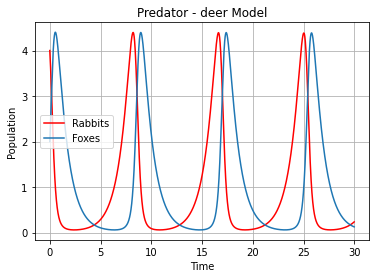

In [4]:
plt.plot( t, result_solve_ivp.y[0, :], 'r', label='Rabbits')
plt.plot(t, result_solve_ivp.y[1, :], label='Foxes')
plt.xlabel('Time')
plt.ylabel('Population')  
plt.title('Predator - deer Model')
plt.grid()
plt.legend()     

Hay que tener en cuenta que el modelo presa - depredador de Lotka-Volterra tiene varias supociciones, por ejemplo, se supone que el depredador se alimenta exclusivamente de cierta presa entonces su alimentación depende totalmente del bienestar de la presa. También se supone cierta homogeneidad en el medio, es decir, que los cambios climáticos no afectan las interacciones de la presa ni del depredador, y por último que solo hay dos animales en la interracción, presa y depredador. Las ecuaciones que modelan el sistema son 

$$\frac{dx}{dt}=x({\alpha}-{\beta} y)$$
$$\frac{dy}{dt}=-y({\gamma}-{\delta} x)$$

$\frac{dx}{dt}$ describe la taza de cambio en la poblacion de conejos 

$\frac{dy}{dt}$ describe la taza de cambio en la poblacion de zorros

Cada parámetro describe:

$\alpha:$ Natalidad de los conejos

$\beta:$ Probabilidad de que los zorros cacen a un conejo

$\gamma:$ tasa de decrecimiento de la población de zorros

$\delta:$ La couta de presas que necesita cada zorro para sobrevivir 

Para nuestro ejercicio, cada uno de los parámetros anteriores será igual a uno.

Lo primero que podemos notar en la gráfica es que ambos gráficos tienen picos seguidos, una interpretación a este suceso es que a medida que crece la población de conejos, los zorros tienen mas alimento para consumir por ende su población también crece, pero cuando la población de zorros crece hasta una cantidad que iguale a la población de conejos entonces se va a suceder un decrecimiento en la población de conejos ya que hay mas depredadores que presas y al disminuir la población de conejos también disminuye la población de zorros. Estas interacciones se repiten de forma periódica y cíclica. 

Ahora bien, es observable que la altura de ambas gráficas, la azul y la roja, es la misma. Esto sucede ya que tomamos los parámetros de las ecuaciones iguales a uno. Si cambiamos el valor de estos parámetros, la altura de cada gráfico cambia ya que estos parametros modelan comportamientos mas específicos del sistema, como por ejemplo, la tasa de decrecimiento de la población de zorros. 

La periodicidad o interaccón cíclica del sistema se puede visualizar mejor en el siguiente gráfico: 
 

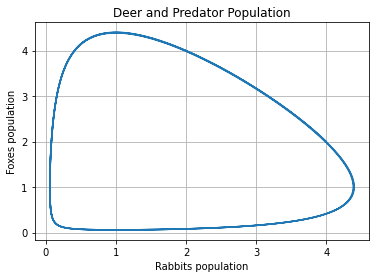

In [5]:
plt.plot(result_solve_ivp.y[0, :], result_solve_ivp.y[1, :])
plt.title('Deer and Predator Population')
plt.xlabel('Rabbits population')
plt.ylabel('Foxes population')
plt.grid()

En este grafico se puede observar que a medida que aumenta la población de conejos aumenta la población de zorros y a medida que disminuye la población de conejos disminuye la de zorros de manera cíclica, esa es la razón de la forma del gráfico anterior. 

# Feedback:
```
Exercise 1.
Solution + presentation of the results	            (max 3.0p):	0.0p

Exercise 2.
Solution + presentation of the results	            (max 4.0p):	0.0p

Exercise 3.
Solution + presentation of the results	            (max 3.0p):	0.0p

Exercise 4 ODEINT.
Solution + presentation of the results	            (max 7.0p):	0.0p

Exercise 4 IVP.
Solution + presentation of the results	            (max 10.0p):  10.0p



- Total:                                              (max 10.0p):   10.0p
```